In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

Set the path to the directory containing the census files

In [25]:
path = r'C:/Users/Laiba/Desktop/bytewise/projectone/US_Census Data Cleaning/'

Use glob to get a list of all csv files in the directory

In [26]:
all_files = glob.glob(path + "*.csv")
us_census = pd.concat((pd.read_csv(f) for f in all_files))

Step 2: Inspect the data

In [27]:
print(us_census.head())
print(us_census.columns)
print(us_census.dtypes)

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific              Income            GenderPop  
0  0.03435374149659865%  $43296

Step 3: Split the GenderPop column into Men and Women columns and convert them to numerical datatypes

In [28]:
us_census[['Men', 'Women']] = us_census['GenderPop'].str.split("_", expand=True)
us_census['Men'] = pd.to_numeric(us_census['Men'].str[:-1])
us_census['Women'] = pd.to_numeric(us_census['Women'].str[:-1])

Step 4: Fill in the missing values in Women column

In [29]:
us_census['Women'] = us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'])

Step 5: Remove duplicates

In [30]:
us_census = us_census.drop_duplicates()

Step 6: Make a scatterplot of average income vs proportion of women

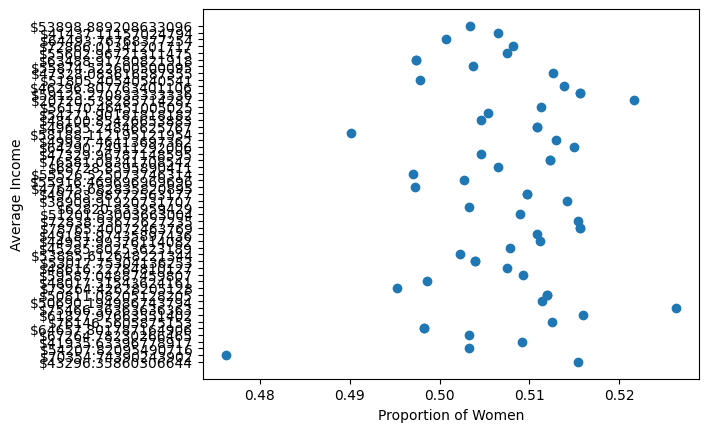

In [31]:
plt.scatter(us_census['Women'] / us_census['TotalPop'], us_census['Income'])
plt.xlabel('Proportion of Women')
plt.ylabel('Average Income')
plt.show()

Step 7: Make histograms for the race categories

In [32]:
us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].replace('%', '', regex=True).astype(float)
us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']] = us_census[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].fillna(0)

![Graph Title](Screenshot (93))


'[Graph' is not recognized as an internal or external command,
operable program or batch file.


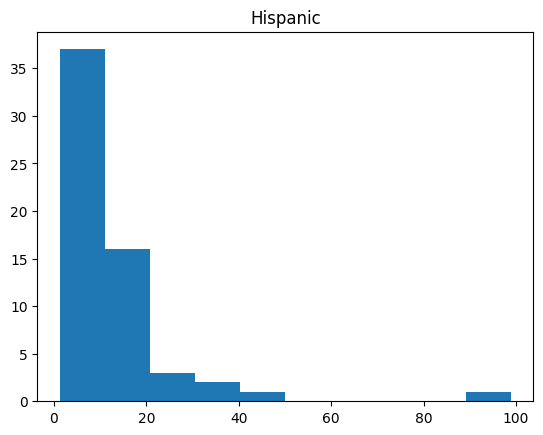

'[Graph' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
plt.hist(us_census['Hispanic'])
plt.title('Hispanic')
plt.show()

![Graph Title](Screenshot (94).png)


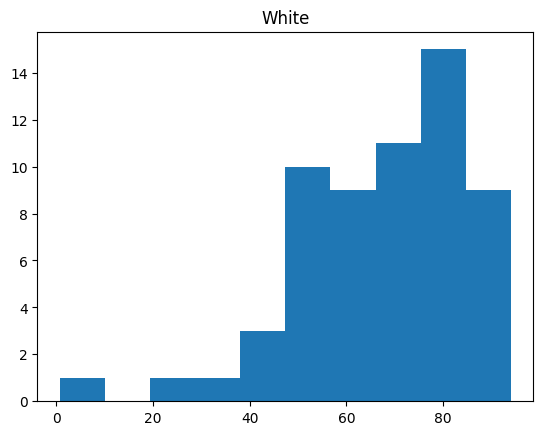

In [34]:
plt.hist(us_census['White'])
plt.title('White')
plt.show()

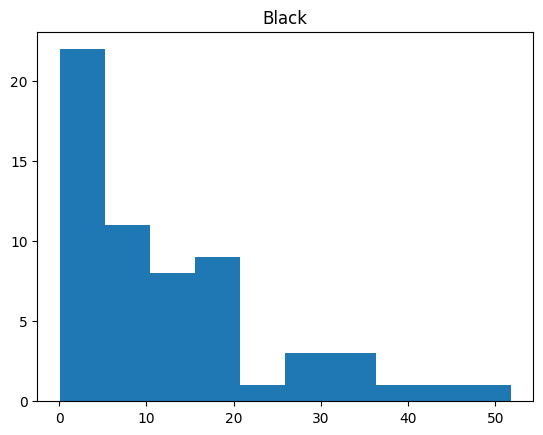

In [35]:
plt.hist(us_census['Black'])
plt.title('Black')
plt.show()

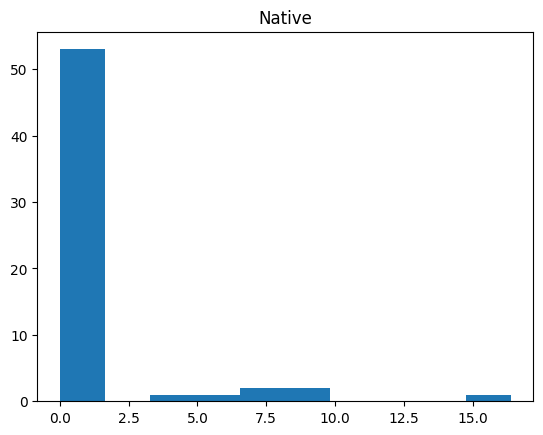

In [36]:
plt.hist(us_census['Native'])
plt.title('Native')
plt.show()

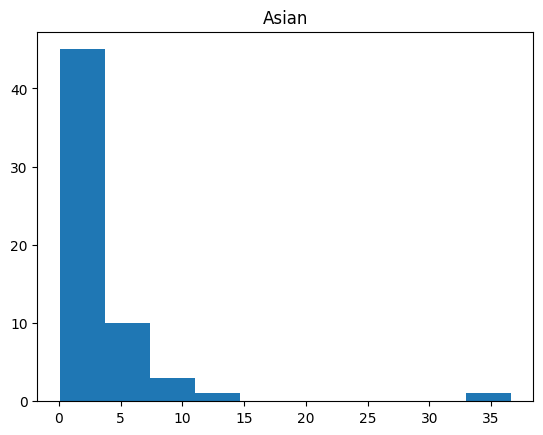

In [37]:
plt.hist(us_census['Asian'])
plt.title('Asian')
plt.show()

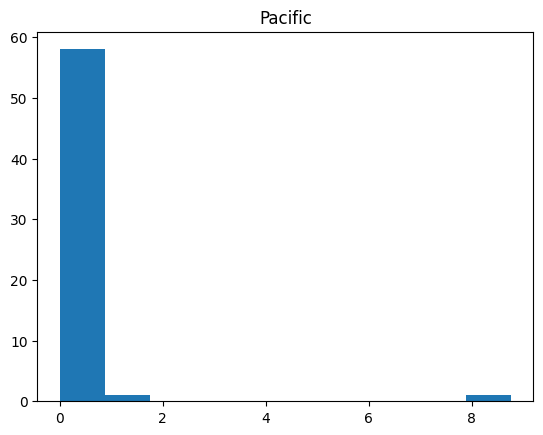

In [38]:
plt.hist(us_census['Pacific'])
plt.title('Pacific')
plt.show()